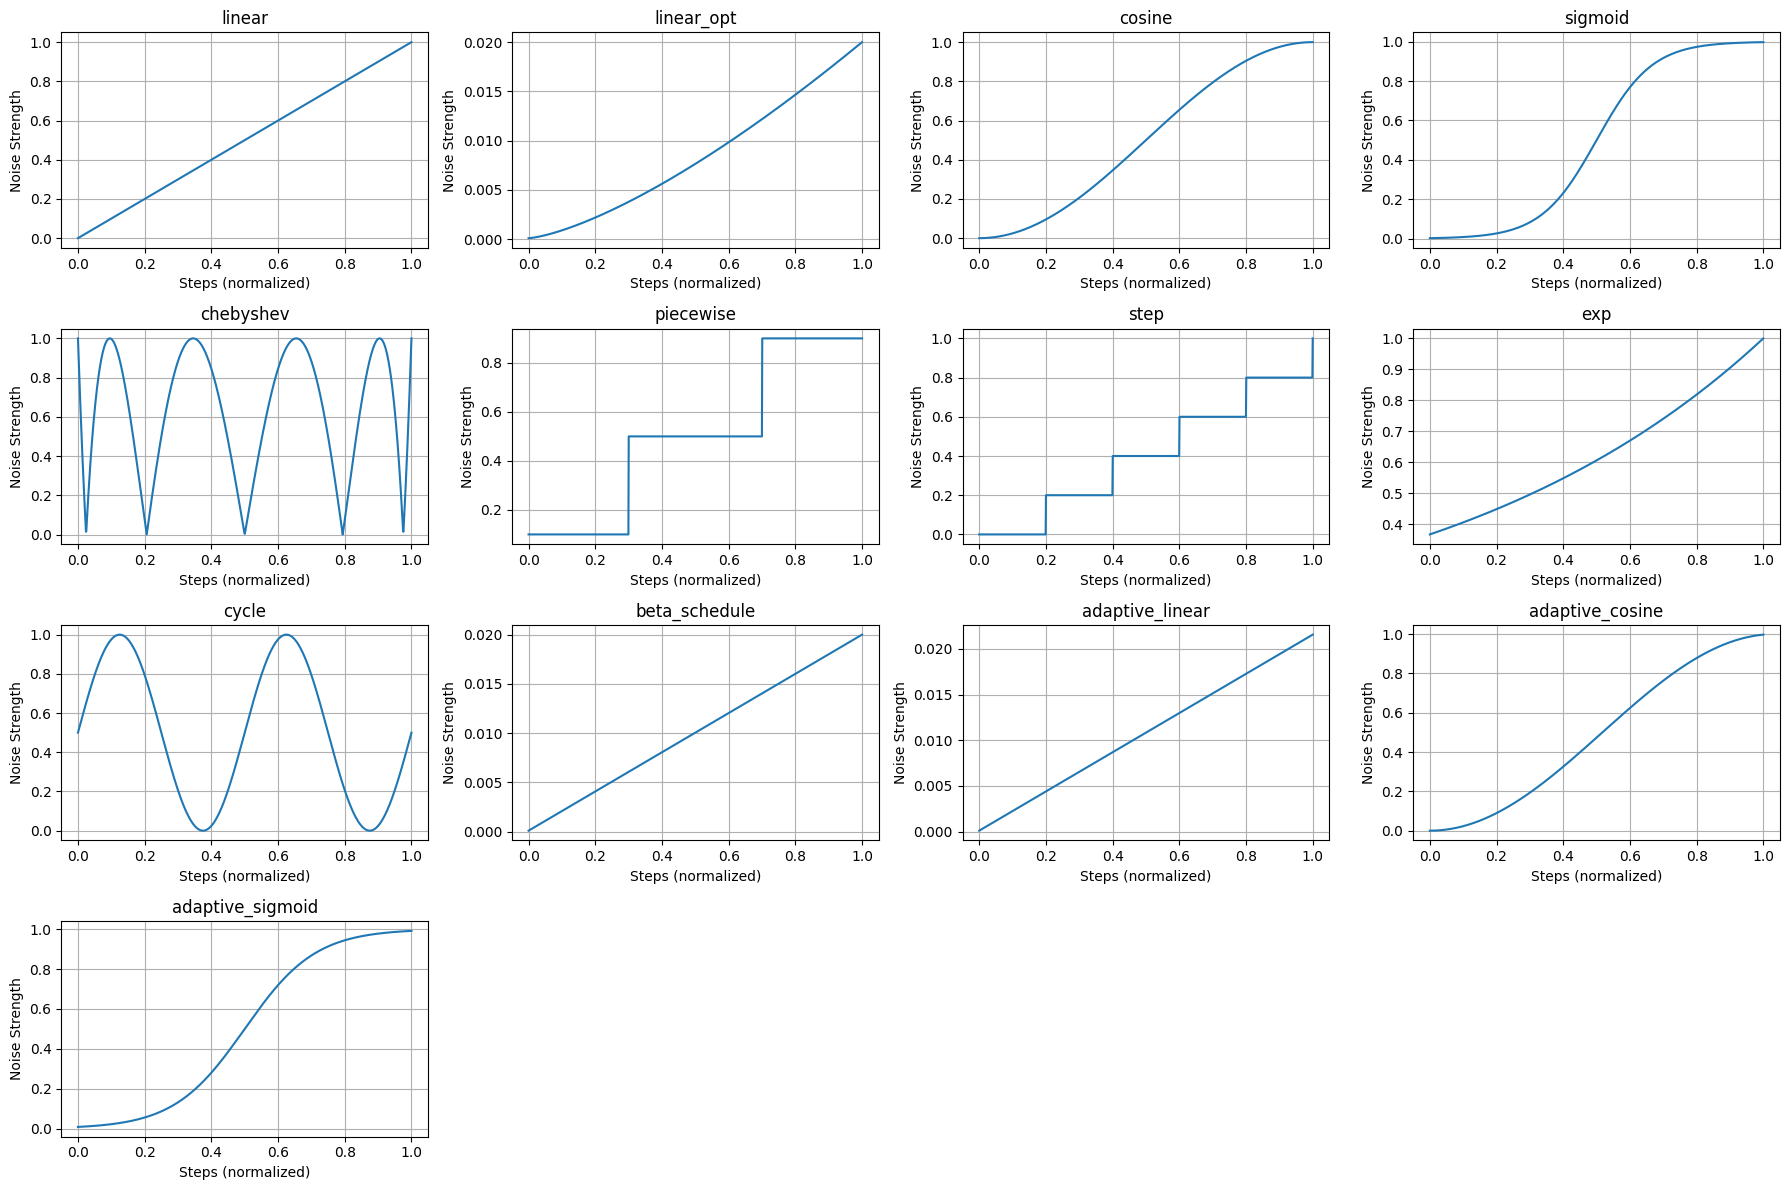

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 設定排程種類
steps = 1000
x = np.linspace(0, 1, steps)

# 定義排程函數
def get_schedule(schedule_type):
    if schedule_type == "linear":
        return np.linspace(0, 1, steps)
    elif schedule_type == "linear_opt":
        alpha = 1.4
        beta_start = 1e-4
        beta_end = 0.02
        return beta_start + (beta_end - beta_start) * (x ** alpha)
    elif schedule_type == "cosine":
        return 0.5 * (1 - np.cos(np.pi * x))
    elif schedule_type == "sigmoid":
        return 1 / (1 + np.exp(-12 * (x - 0.5)))
    elif schedule_type == "chebyshev":
        return np.abs(np.cos(5 * np.arccos(2 * x - 1)))
    elif schedule_type == "piecewise":
        return np.piecewise(x, [x < 0.3, (x >= 0.3) & (x < 0.7), x >= 0.7], [0.1, 0.5, 0.9])
    elif schedule_type == "step":
        return np.floor(x * 5) / 5
    elif schedule_type == "exp":
        return np.exp(x) / np.exp(1)
    elif schedule_type == "cycle":
        return 0.5 * (1 + np.sin(4 * np.pi * x))
    elif schedule_type == "beta_schedule":
        return np.linspace(1e-4, 0.02, steps)
    elif schedule_type == "adaptive_linear":
        beta_end = 0.02 * np.random.uniform(0.85, 1.1)
        return np.linspace(1e-4, beta_end, steps)
    elif schedule_type == "adaptive_cosine":
        factor = np.random.uniform(0.8, 1.2)
        return 0.5 * (1 - np.cos(np.pi * factor * x))
    elif schedule_type == "adaptive_sigmoid":
        k = np.random.uniform(8, 16)
        return 1 / (1 + np.exp(-k * (x - 0.5)))
    else:
        raise ValueError(f"Unknown schedule: {schedule_type}")

# 排程種類列表
schedule_types = [
    "linear", "linear_opt", "cosine", "sigmoid", "chebyshev", 
    "piecewise", "step", "exp", "cycle", "beta_schedule", 
    "adaptive_linear", "adaptive_cosine", "adaptive_sigmoid"
]

# 繪製圖形
plt.figure(figsize=(18, 12))
for i, schedule_type in enumerate(schedule_types):
    plt.subplot(4, 4, i+1)
    y = get_schedule(schedule_type)
    plt.plot(x, y, label=schedule_type)
    plt.title(schedule_type)
    plt.xlabel('Steps (normalized)')
    plt.ylabel('Noise Strength')
    plt.grid(True)

plt.tight_layout()
plt.show()


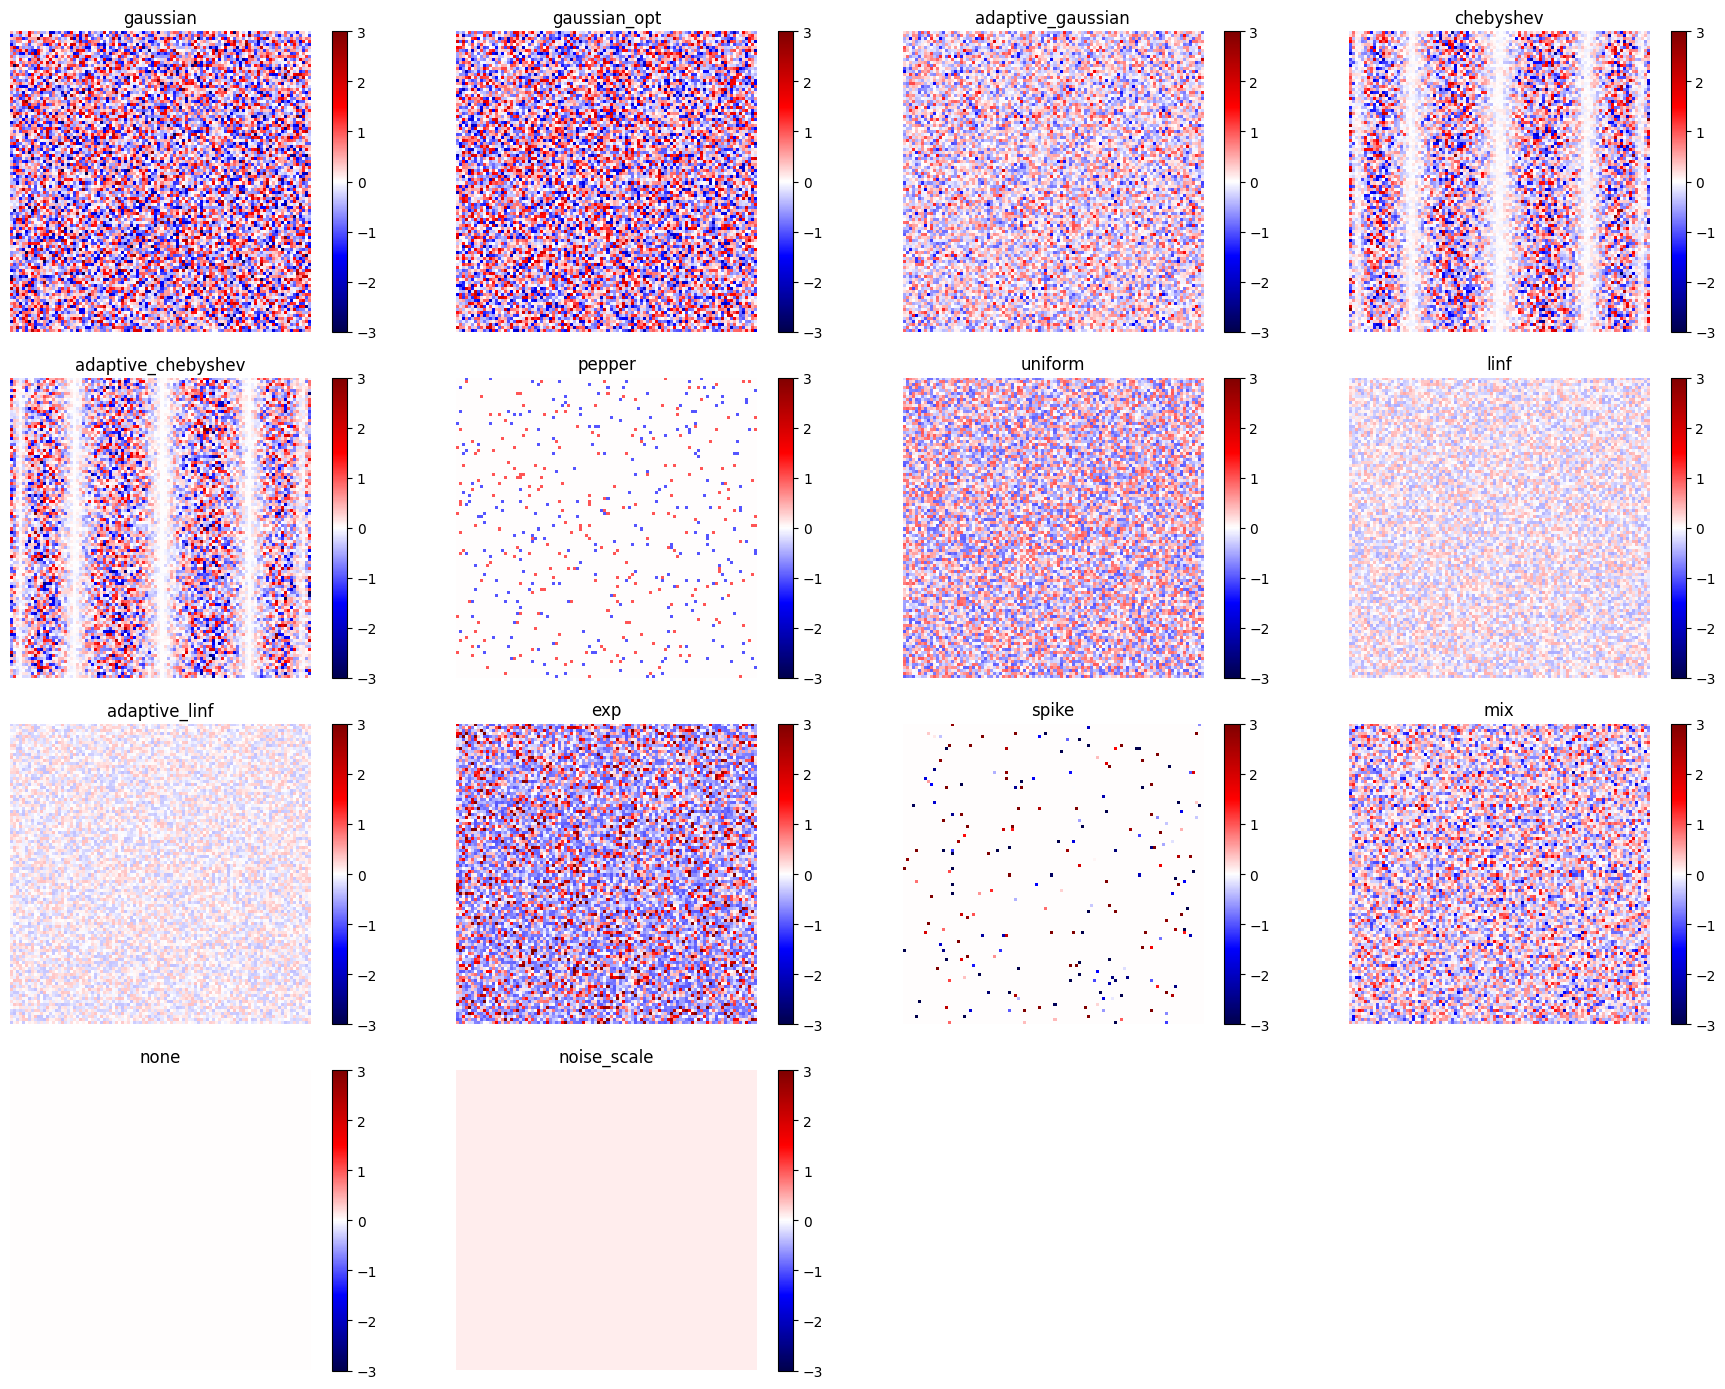

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.zeros((100, 100))

# 定義噪聲函數
def get_noise(noise_type, shape):
    if noise_type == "gaussian":
        return np.random.normal(0, 1, shape)
    elif noise_type == "gaussian_opt":
        noise = np.random.normal(0, 1, shape)
        return np.clip(noise, -2, 2)
    elif noise_type == "adaptive_gaussian":
        std = np.random.uniform(0.5, 1.5)
        return np.random.normal(0, std, shape)
    elif noise_type == "chebyshev":
        pos = np.linspace(-1, 1, shape[1])
        std = np.abs(np.cos(5 * np.arccos(pos)))
        return np.random.normal(0, std, shape)
    elif noise_type == "adaptive_chebyshev":
        pos = np.linspace(-1, 1, shape[1])
        std = np.abs(np.cos(np.random.uniform(3, 7) * np.arccos(pos)))
        return np.random.normal(0, std, shape)
    elif noise_type == "pepper":
        noise = np.zeros(shape)
        pepper_mask = np.random.rand(*shape) < 0.05
        noise[pepper_mask] = np.random.choice([-1, 1], size=pepper_mask.sum())
        return noise
    elif noise_type == "uniform":
        return np.random.uniform(-1, 1, shape)
    elif noise_type == "linf":
        epsilon = 0.5
        return np.random.uniform(-epsilon, epsilon, shape)
    elif noise_type == "adaptive_linf":
        epsilon = np.random.uniform(0.3, 0.7)
        return np.random.uniform(-epsilon, epsilon, shape)
    elif noise_type == "exp":
        return np.random.exponential(1, shape) - 1
    elif noise_type == "spike":
        noise = np.zeros(shape)
        spike_mask = np.random.rand(*shape) < 0.02
        noise[spike_mask] = np.random.uniform(-5, 5, spike_mask.sum())
        return noise
    elif noise_type == "mix":
        return (0.6 * np.random.normal(0, 1, shape) +
                0.2 * np.random.uniform(-1, 1, shape) +
                0.2 * (np.random.rand(*shape) > 0.98).astype(float) * np.random.uniform(-3, 3, shape))
    elif noise_type == "none":
        return np.zeros(shape)
    elif noise_type == "noise_scale":
        scale = np.random.uniform(0.8, 1.2)
        return (scale - 1) * np.ones(shape)
    else:
        raise ValueError(f"Unknown noise type: {noise_type}")

noise_types = [
    "gaussian", "gaussian_opt", "adaptive_gaussian", "chebyshev", "adaptive_chebyshev", 
    "pepper", "uniform", "linf", "adaptive_linf", "exp", "spike", "mix", "none", "noise_scale"
]

plt.figure(figsize=(18, 14))
for i, noise_type in enumerate(noise_types):
    plt.subplot(4, 4, i+1)
    noise = get_noise(noise_type, x.shape)
    plt.imshow(noise, cmap='seismic', vmin=-3, vmax=3)
    plt.colorbar()
    plt.title(noise_type)
    plt.axis('off')

plt.tight_layout()
plt.show()
